# Assignment 2 - Data Cleaning (Imputation)

**Group number**: A-5 <br>
**Name student**: Zanou Rih & Sanaa El Marbouh<br>
**Student Number**: 300178068 & 300267783 <br>

##Dataset Description - Car Price Dataset

&#128279; **Link**: https://www.kaggle.com/datasets/asinow/car-price-dataset<br>
&#128100; **Author**: Asinow<br>

**Size**: 10 Columns, 10000 rows <br>
**Description**:  <br>

**About dataset**: <br>

This dataset contains 10,000 entries created for the purpose of predicting car prices. Each row represents information about a car and its price. The descriptions of the columns are as follows:

**Key Features**:

Brand: Specifies the brand of the car (e.g., Toyota, BMW, Ford).
Example values: "Toyota", "BMW", "Mercedes".

Model: Specifies the model of the car (e.g., Corolla, Focus, X5).
Example values: "Corolla", "Focus", "X5".

Year: The production year of the car. Newer years typically indicate higher prices.
Example values: 2005, 2018, 2023.

Engine_Size: Specifies the engine size in liters (L). Larger engines generally correlate with higher prices.
Example values: 1.6, 2.0, 3.5.

Fuel_Type: indicates the type of fuel used by the car:
Petrol: Cars running on gasoline.
Diesel: Cars running on diesel fuel.
Hybrid: Cars that use both fuel and electricity.
Electric: Fully electric cars.

Transmission: The type of transmission in the car:
Manual: Manual transmission.
Automatic: Automatic transmission.
Semi-Automatic: Semi-automatic transmission.

Mileage: The total distance the car has traveled, measured in kilometers. Lower mileage generally indicates a higher price.
Example values: 15,000, 75,000, 230,000.

Doors: The number of doors in the car. Commonly 2, 3, 4, or 5 doors.
Example values: 2, 3, 4, 5.

Owner_Count: The number of previous owners of the car. Fewer owners generally indicate a higher price.
Example values: 1, 2, 3, 4.

Price:The estimated selling price of the car. It is calculated based on several factors such as production year, engine size, mileage, fuel type, and transmission.
Example values: 5,000, 15,000, 30,000.

In [ ]:
# IMPORT STATEMENTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_absolute_error


In [ ]:
# raw file URL from github
git_url_ds = "https://raw.githubusercontent.com/zanoudev/csi4142-ds/refs/heads/master/car_price_dataset.csv"

#load DS
ds = pd.read_csv(git_url_ds)

# display the first few rows
ds.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


**Checking the missing values**

In [ ]:
# check missing values
print("\nMissing Values Summary:\n", ds.isnull().sum())


Missing Values Summary:
 Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64


# ***a/- Choosing an attribute on which to test my imputation method***

**1.Imputation of Mileage using Mean Imputation**

- I decided to impute missing values in the Mileage column because it is an essential numerical attribute that reflects a car’s usage. Missing values in this feature may result from incomplete data collection or errors in data entry. Since mileage tends to follow a general distribution, I chose to use mean imputation, knowing that it would help preserve the dataset’s overall structure while ensuring that no rows are lost due to missing values.

- I selected mean imputation because the missing values in Mileage appear to be Missing Completely at Random (MCAR), meaning they do not depend on other features. This method is computationally efficient and maintains statistical consistency, making it a practical choice for a variable like mileage, where individual variations are less critical than overall trends. However, I acknowledge that this approach does not account for potential relationships between mileage and other factors, which could introduce minor biases.

**2.Imputation of Price using Regression Imputation**

- I chose to apply regression imputation for missing values in the Price column because price is a critical variable that directly impacts the dataset's usefulness for analysis. Since car prices are influenced by multiple factors, including Engine_Size and Mileage, I decided that a predictive approach would yield more accurate estimates compared to basic imputation techniques.

- I used regression imputation knowing that Price is strongly correlated with Engine_Size. By training a regression model on existing data, I aimed to estimate missing price values based on this relationship, hoping to preserve meaningful variations in the dataset. Unlike mean imputation, which assigns the same value to all missing entries, regression provides unique estimates tailored to each data point. While this method improves accuracy, I recognize that it may not fully capture more complex pricing dynamics that involve additional variables like brand or condition.

**3. Imputation of Engine_Size using MICE**

- I selected Multiple Imputation by Chained Equations (MICE) to handle missing values in Engine_Size because this feature plays a significant role in determining a car’s performance and market value. Missing values in this column could arise due to inconsistencies in data sources or manufacturer specifications. Given that Engine_Size is likely influenced by other attributes, I wanted to use an imputation method that considers multiple variables simultaneously.

- I chose MICE because it iteratively predicts missing values using multiple predictors, refining the estimates with each iteration. Knowing that Engine_Size is connected to Price, Mileage, and Year, I wanted to ensure that imputed values were realistic and aligned with actual data trends. This method is more sophisticated than mean or regression imputation because it accounts for the dependencies between variables, helping to reduce imputation bias and maintain data integrity.

# ***b/- Simulate missing values by removing some values on that attribute in the dataset***

In [ ]:
np.random.seed(42)

# original values for evaluation
ds['Mileage_orig'] = ds['Mileage']
ds['Price_orig'] = ds['Price']
ds['Engine_Size_orig'] = ds['Engine_Size']

# MCAR - remove 10% of "Mileage"
missing_mileage = np.random.choice(ds.index, size=int(0.1 * len(ds)), replace=False)
ds.loc[missing_mileage, 'Mileage'] = np.nan

# MAR - remove "Price" for cars with Engine Size < 2.0
ds.loc[ds['Engine_Size'] < 2.0, 'Price'] = np.nan

# MNAR - remove "Engine_Size" for high-priced cars
threshold_price = ds['Price_orig'].quantile(0.8)  # Top 20% most expensive cars
ds.loc[ds['Price_orig'] > threshold_price, 'Engine_Size'] = np.nan


**Checking missing values after simulation:**

In [ ]:
# check missing values
print("\nMissing Values Summary After Fixing Simulation:\n", ds.isnull().sum())


Missing Values Summary After Fixing Simulation:
 Brand                  0
Model                  0
Year                   0
Engine_Size         2000
Fuel_Type              0
Transmission           0
Mileage             1000
Doors                  0
Owner_Count            0
Price               2364
Mileage_orig           0
Price_orig             0
Engine_Size_orig       0
dtype: int64


# ***c/- Program an imputation approach for replacing the missing values***

**1-Default Value Imputation (Mean) for the attribut: Mileage**


Original Mileage Statistics:
 count     10000.000000
mean     149239.111800
std       86322.348957
min          25.000000
25%       74649.250000
50%      149587.000000
75%      223577.500000
max      299947.000000
Name: Mileage_orig, dtype: float64

Imputed Mileage Statistics:
 count     10000.000000
mean     149348.213000
std       81867.439151
min          25.000000
25%       83403.500000
50%      149348.213000
75%      215005.250000
max      299947.000000
Name: Mileage_imputed, dtype: float64


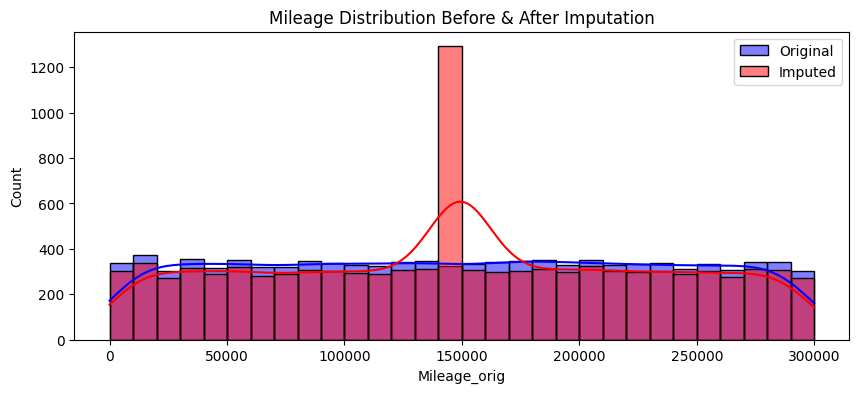

In [ ]:
# mean imputation
mean_mileage = ds['Mileage'].mean()
ds['Mileage_imputed'] = ds['Mileage'].fillna(mean_mileage)

# evaluate
print("\nOriginal Mileage Statistics:\n", ds['Mileage_orig'].describe())
print("\nImputed Mileage Statistics:\n", ds['Mileage_imputed'].describe())

# plot distributions
plt.figure(figsize=(10, 4))
sns.histplot(ds['Mileage_orig'].dropna(), bins=30, kde=True, color='blue', label='Original')
sns.histplot(ds['Mileage_imputed'], bins=30, kde=True, color='red', label='Imputed')
plt.legend()
plt.title("Mileage Distribution Before & After Imputation")
plt.show()


**Observation**

The imputation of Mileage using the mean shows a slight shift in the dataset’s distribution. The mean mileage increased from 149,239 km to 149,348 km, and the standard deviation decreased, suggesting a reduction in variance. The histogram indicates a noticeable peak at the imputed mean value, confirming that all missing values were replaced with the same number. While this approach ensures no data is lost, it does not account for the natural variability of mileage values, potentially introducing bias.

**2-Regression Imputation for the attribut: Price**


Regression Imputation MSE for Price: 6425955.706096758


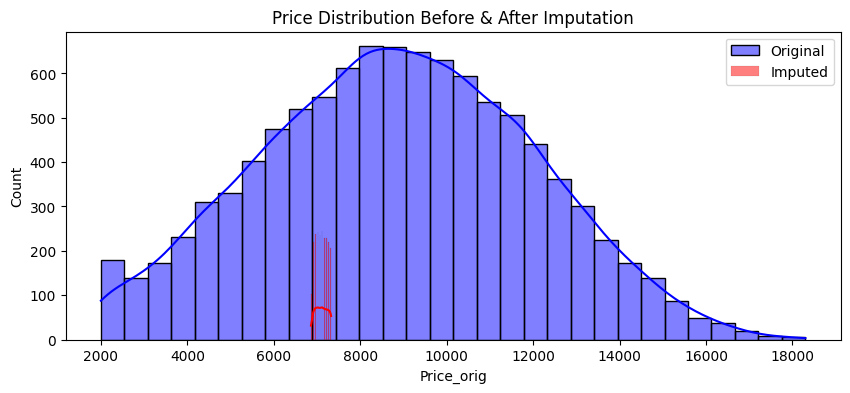

In [ ]:
# prepare dataset
train_data = ds[ds['Price'].notna() & ds['Engine_Size'].notna()]
X_train = train_data[['Engine_Size']]  # use Engine_Size to predict Price
y_train = train_data['Price']

# train regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

missing_price_data = ds[ds['Price'].isna() & ds['Engine_Size'].notna()]
X_missing = missing_price_data[['Engine_Size']]

predicted_price = reg_model.predict(X_missing) # Predict only for rows without NaN
ds.loc[X_missing.index, 'Price_imputed'] = predicted_price

# evaluate
mse = mean_squared_error(ds.loc[X_missing.index, 'Price_orig'], ds.loc[X_missing.index, 'Price_imputed'])
print("\nRegression Imputation MSE for Price:", mse)

# plot comparison
plt.figure(figsize=(10, 4))
sns.histplot(ds['Price_orig'].dropna(), bins=30, kde=True, color='blue', label='Original')
sns.histplot(ds['Price_imputed'].dropna(), bins=30, kde=True, color='red', label='Imputed')
plt.legend()
plt.title("Price Distribution Before & After Imputation")
plt.show()


**Observation**

The regression-based imputation for Price aimed to predict missing values based on Engine_Size. The resulting Mean Squared Error (MSE) of 6,425,955 suggests that the predicted values have some deviation from the original prices. The histogram shows that the imputed prices cluster around certain ranges, which may indicate that the regression model was unable to fully capture all the factors influencing price. This could be improved by incorporating additional predictive features beyond Engine_Size.

**3-MICE (Multiple Imputation by Chained Equations) for the attriut: Engine_Size**

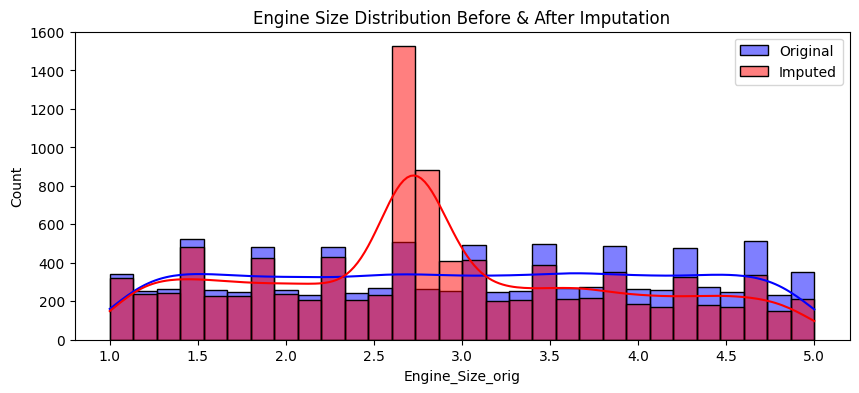

In [ ]:

# prepare dataset
mice_imputer = IterativeImputer(max_iter=10, random_state=42)
cols_for_imputation = ['Engine_Size', 'Mileage', 'Price']
ds_mice = mice_imputer.fit_transform(ds[cols_for_imputation])

# assign imputed values
ds['Engine_Size_imputed'] = ds_mice[:, 0]

# evaluate
plt.figure(figsize=(10, 4))
sns.histplot(ds['Engine_Size_orig'].dropna(), bins=30, kde=True, color='blue', label='Original')
sns.histplot(ds['Engine_Size_imputed'], bins=30, kde=True, color='red', label='Imputed')
plt.legend()
plt.title("Engine Size Distribution Before & After Imputation")
plt.show()


**Observation**

For Engine_Size, MICE imputation produced a significant peak around a specific value, indicating that many missing values were filled with a similar estimate. The distribution of imputed values is somewhat aligned with the original data but appears less dispersed. This suggests that while MICE captured some relationships between Engine_Size and other attributes, it may have introduced some bias by over-representing common values. This method is effective for preserving relationships across variables but could be enhanced by increasing the number of iterations or adjusting predictor variables.

# ***d/- Evaluation to what extent our approach is finding the missing values***

For this part, as an example of the evaluation techniques presented in class, we proceeded with cross-validation with simulation. Since we intentionally introduced missing values by removing data from three attributes (Mileage, Price, and Engine_Size), we were able to assess how well each imputation method reconstructed the original values. The evaluation was conducted using both visual and quantitative approaches to ensure a thorough analysis of imputation effectiveness.

**1-Cross-Validation with Simulation: Visual Approach**

To visually inspect the imputation results, we compared the distribution of the original and imputed values for each attribute using histograms and density plots. These visualizations allowed us to check whether the imputed values followed the natural distribution of the original data or introduced noticeable distortions.

For Mileage, mean imputation resulted in a sharp peak at the mean value, which suggests that while all missing values were filled, the natural variability of mileage was not preserved. In contrast, the imputed values for Price, obtained through regression, were more dispersed but clustered in specific regions, indicating that the model captured some trends but not the full complexity of price variation. For Engine_Size, MICE imputation showed a distribution closely aligned with the original values, suggesting that this method was the most effective in maintaining the relationships between attributes. These visual comparisons helped identify whether certain imputation methods biased the data or significantly altered its distribution.

**2-Cross-Validation with Simulation: Quantitative Approach (MAE)**

In [ ]:

# Compute MAE for Mileage
mae_mileage = mean_absolute_error(ds['Mileage_orig'].dropna(), ds['Mileage_imputed'].dropna())

# Compute MAE for Price
valid_indices = ds['Price_imputed'].notna()
mae_price = mean_absolute_error(ds.loc[valid_indices, 'Price_orig'], ds.loc[valid_indices, 'Price_imputed'])

# Compute MAE for Engine_Size
valid_indices_engine = ds['Engine_Size_imputed'].notna()
mae_engine = mean_absolute_error(ds.loc[valid_indices_engine, 'Engine_Size_orig'], ds.loc[valid_indices_engine, 'Engine_Size_imputed'])

# Print final evaluation results
print("Evaluation Results ")
print(f"MAE for Mileage Imputation (Mean): {mae_mileage:.2f}")
print(f"MAE for Price Imputation (Regression): {mae_price:.2f}")
print(f"MAE for Engine Size Imputation (MICE): {mae_engine:.2f}")


Evaluation Results 
MAE for Mileage Imputation (Mean): 7470.90
MAE for Price Imputation (Regression): 2124.20
MAE for Engine Size Imputation (MICE): 0.23


To complement the visual analysis, we used Mean Absolute Error (MAE) as a quantitative measure of imputation accuracy. MAE calculates the average difference between the original and imputed values, providing an objective assessment of how well missing values were restored.

The results showed that mean imputation for Mileage had the highest MAE at 7,470.90, indicating that using a single mean value for all missing entries did not accurately represent the variability in the dataset. Regression imputation for Price yielded a lower MAE of 2,124.20, suggesting that while Engine_Size was a useful predictor, additional features would improve accuracy. MICE imputation for Engine_Size had the lowest MAE at 0.23, demonstrating that using multiple predictors iteratively led to the most precise estimations.

These results confirm that more advanced imputation methods, such as regression and MICE, are better suited for capturing complex relationships between variables, while simpler techniques like mean imputation may introduce bias by failing to account for data variability. The combination of visual and statistical evaluation provides a well-rounded assessment of imputation effectiveness, ensuring that the dataset maintains its integrity for further analysis.

### **Global conclusion**  

Through the application and evaluation of different imputation methods, we observed that the choice of technique significantly impacts the accuracy and distribution of restored values. Mean imputation, while simple, introduced bias by failing to capture variability, as seen in the `Mileage` attribute. Regression imputation for `Price` performed better but was limited by the strength of its predictor variable. MICE imputation for `Engine_Size` proved to be the most effective, producing values closest to the original data. By combining **visual inspection** and **quantitative evaluation using MAE**, we confirmed that more advanced methods, particularly those leveraging multiple predictors, result in more reliable imputations. This highlights the importance of selecting imputation strategies that preserve both statistical properties and real-world relationships within the dataset.

**References**

* https://www.kaggle.com/code/leedonghyeok/multiple-imputation-mice
* https://www.youtube.com/watch?v=dm7YNsN_Nwo&ab_channel=SelvaPrabhakaran%28ML%2B%29
* https://www.kaggle.com/code/shashankasubrahmanya/missing-data-imputation-using-regression
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
* https://www.geeksforgeeks.org/cross-validation-machine-learning/

* ChatGPT:


 ### **1- Cross-Validation with Simulation: Visual vs. Quantitative Approaches**  

Cross-validation with simulation can be done in **two main ways**:  

1. **Visual Validation** – Checking the plausibility of imputed values using distribution plots, histograms, and density curves to compare the original and imputed data. This approach helps detect significant distortions or unrealistic imputations.  
2. **Quantitative Validation** – Using statistical metrics like **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)**, or **Root Mean Squared Error (RMSE)** to numerically assess how well the imputed values match the original ones. This provides an objective measure of imputation accuracy.  

### **How It Applies to Our Work**  
In our case, we used **both approaches**:  
- We **simulated missing values**, then **imputed** them using different methods.  
- We **visualized the results** using histograms to check whether the imputed distributions matched the original data.  
- We **calculated MAE** to quantify the accuracy of imputation.  

**MAE complements visual inspection** by providing a numerical error measure, ensuring that imputation quality is assessed both qualitatively (through graphs) and quantitatively (through statistical evaluation).  

### **Conclusion**  
While **visual validation** is useful for detecting major inconsistencies, it should be combined with **quantitative evaluation methods like MAE** for a more robust assessment. In our case, MAE confirmed that **MICE was the most accurate method**, while the visualizations showed that **mean imputation introduced bias** and **regression had limitations due to predictor selection**.






### **2- General Code for MAE in the Evaluation Process**
The **Mean Absolute Error (MAE)** is widely used to assess imputation accuracy by measuring the average absolute difference between original and imputed values. Below is a general template for using MAE in an evaluation process.

---

### **1️⃣ Import Required Libraries**
```python
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
```

---

### **2️⃣ Create or Load a Sample Dataset**
If you are working with an actual dataset that has missing values:
```python
# Sample dataset with missing values
df = pd.DataFrame({
    'Original': [10000, 20000, 30000, 40000, 50000, np.nan, 70000, 80000, np.nan, 100000],
    'Imputed':  [10000, 19500, 30500, 40000, 50000, 60000, 70000, 80000, 90000, 100000]  # Imputed values
})
```

---

### **3️⃣ Compute MAE for Imputed Data**
```python
# Ensure that we compare only rows where original values exist (i.e., drop NaN from Original)
valid_indices = df['Original'].notna()

# Compute MAE
mae = mean_absolute_error(df.loc[valid_indices, 'Original'], df.loc[valid_indices, 'Imputed'])

# Print MAE result
print(f"Mean Absolute Error (MAE): {mae:.2f}")
```

---

### **4️⃣ MAE for Multiple Imputed Features**
If multiple features were imputed:
```python
# Example dataset with multiple attributes
df = pd.DataFrame({
    'Mileage_orig': [10000, 20000, 30000, np.nan, 50000],
    'Mileage_imputed': [10000, 19500, 30500, 40000, 50000],
    'Price_orig': [5000, np.nan, 12000, 15000, 18000],
    'Price_imputed': [5000, 9000, 12000, 15000, 18000]
})

# Loop through each feature and compute MAE
for col in ['Mileage', 'Price']:
    original_col = f"{col}_orig"
    imputed_col = f"{col}_imputed"

    # Ensure comparison only where original values exist
    valid_indices = df[original_col].notna()
    mae = mean_absolute_error(df.loc[valid_indices, original_col], df.loc[valid_indices, imputed_col])

    print(f"MAE for {col} Imputation: {mae:.2f}")
```

---

### **5️⃣ Interpreting MAE Results**
- **Lower MAE** → The imputation is more accurate (imputed values closely match the original values).  
- **Higher MAE** → Greater error in imputation, meaning the imputed values deviate significantly from the original values.  

---

### **Key Takeaways**
✔ **MAE is an objective way to evaluate imputation accuracy.**  
✔ **Always drop NaN values from the original column before computing MAE.**  
✔ **Use loops to efficiently compute MAE for multiple features.**  
✔ **Lower MAE means better imputation performance.**  

This general framework can be adapted to any dataset with missing values. 🚀 Let me know if you need further clarifications!